In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact

In [334]:
#Task 2_1
import pandas as pd
df = pd.read_excel (r'RestaurantProfitElementAnalysis.xlsx')
df.head().round(0)

,profit,people,price_of_beef,price_of_potato,sample,sunshine_index,marketing
0,14.0,78.0,50.0,8.0,169,10,222
1,8.0,73.0,48.0,8.0,167,13,224
2,14.0,70.0,46.0,8.0,167,15,247
3,10.0,67.0,45.0,8.0,165,18,263
4,15.0,68.0,45.0,8.0,120,19,653


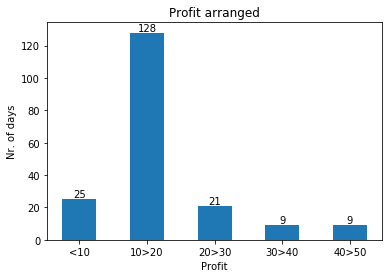

In [344]:
#Task 2_2
import numpy as np
import matplotlib.pyplot as plt

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
for x in df['profit']:
    if x < 10 :
        list1.append(1)
    if x<20 and x>10:
        list2.append(1)
    if x<30 and x>20:
        list3.append(1)
    if x<40 and x>30:
        list4.append(1)
    if x<50 and x>40:
        list5.append(1)
        
top=[('<10',len(list1)),('10>20',len(list2)),('20>30',len(list3)),('30>40',len(list4)),('40>50',len(list5))]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 0.5


bar=plt.bar(xs, ys, width, align='center')
for rect in bar:
    height=rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height,'%d'% int(height),ha='center',va='bottom')
    
plt.title('Profit arranged')
plt.xlabel('Profit')
plt.xticks(xs, labels) 

plt.ylabel('Nr. of days')
plt.show()

In [347]:
#Task 2_3

list_categories=df.columns
std={}
mean={}
z_i={}
for x in list_categories:
    std[x]=np.std(df[x])
    mean[x]=np.mean(df[x])
    z_i[x]=(df[x]-mean[x])/std[x]
    
means=pd.Series(mean)
stds=pd.Series(std)
frame={'Mean':means,'Std':stds}
Mean_std=pd.DataFrame(frame).T
Normalized_data=pd.DataFrame(z_i,columns=list_categories)



Normalized_data.head(10).round(2)

,profit,people,price_of_beef,price_of_potato,sample,sunshine_index,marketing
0,-0.37,0.73,1.22,-1.27,5.04,-3.19,-2.71
1,-0.92,0.32,0.78,-1.04,4.96,-2.59,-2.67
2,-0.33,0.07,0.57,-0.93,4.96,-2.19,-2.21
3,-0.80,-0.18,0.24,-0.70,4.87,-1.59,-1.88
4,-0.30,-0.10,0.22,-0.59,3.02,-1.39,5.99
5,-0.74,-0.18,0.07,-0.36,2.74,-1.59,6.01
6,-0.61,-0.52,-0.39,-0.01,2.41,-0.78,5.34
7,-0.37,-0.77,-0.72,0.22,2.00,-0.58,2.13
8,-0.36,-0.68,-0.66,0.10,1.58,-0.58,2.27
9,0.09,-0.60,-0.55,0.10,1.25,-0.78,2.31


In [348]:
Mean_std.round(1)

,profit,people,price_of_beef,price_of_potato,sample,sunshine_index,marketing
Mean,17.5,69.2,43.5,8.9,46.5,25.9,356.4
Std,9.8,12.0,5.2,0.9,24.3,5.0,49.6


In [349]:
#Task 2_4

percentile_50={} 
percentile_70={} 
percentile_90={} 
max_value={} 
min_value={}
for x in list_categories: 
    percentile_50[x]=np.percentile(df[x],50) 
    percentile_70[x]=np.percentile(df[x],70) 
    percentile_90[x]=np.percentile(df[x],90) 
    max_value[x]=np.max(df[x]) 
    min_value[x]=np.min(df[x])
   
percentile50=pd.Series(percentile_50) 
percentile70=pd.Series(percentile_70)
percentile90=pd.Series(percentile_90)
maxx=pd.Series(max_value)
minn=pd.Series(min_value)
frame={'Percentile 50':percentile50,'Percentile 70':percentile70,
       'Percentile 90':percentile90, 'Min Value': minn, 'Max value': maxx }
fr=pd.DataFrame(frame).T
fr.round(1)


,profit,people,price_of_beef,price_of_potato,sample,sunshine_index,marketing
Percentile 50,14.5,65.0,42.2,8.9,48.0,26.0,352.0
Percentile 70,17.7,72.9,45.1,9.3,52.0,29.0,358.0
Percentile 90,31.9,90.0,52.1,9.9,54.3,32.0,382.8
Min Value,7.0,52.0,34.8,7.1,4.0,10.0,222.0
Max value,58.8,100.0,55.7,11.9,169.0,35.0,654.0


In [350]:
#Task 2_5
import ipywidgets as widgets
from ipywidgets import interact, Checkbox
@interact
def checkcorrelation(Choice=df.columns.drop('profit'),
                     Prediction_Nr=widgets.IntSlider(min=10, max=150, step=5, value=50)):
    x=df[Choice]
    y=df['profit']
    
    b, a = np.polyfit(x, y, 1)
    
    y_pred = a + b*x 
    
    plt.scatter(x, y, color = "m", marker = "o", s = 30) 
    plt.plot(x,y_pred,color='b')

    Title='Correlation between Profit and '+Choice
    plt.title(Title)
    plt.xlabel(Choice) 
    plt.ylabel('Profit') 
   
    print('Task a:','Example of prediction for',Prediction_Nr,Choice,'/profit='
          ,y_pred[Prediction_Nr].round(4))
    
    correlation_matrix= np.corrcoef(x, y)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    r_rounded=r_squared.round(4)*100
    print('\n')
    print('Task b:','R^2=',r_rounded)
    print('\n','Correlation coeff: ',correlation_xy.round(3))
    print('\n','\n','Task c:')
    plt.show() 

interactive(children=(Dropdown(description='Choice', options=('people', 'price_of_beef', 'price_of_potato', 's…

In [351]:
#Task 6
@interact
def Conut(Prediction_Nr=widgets.IntSlider(min=10, max=150, step=10, value=50)):
     
    x=df[['people','price_of_beef','price_of_potato','sunshine_index','sample','marketing']]
    y=df['profit']
    x1=sm.add_constant(x)
    statmodelApi_Reg=sm.OLS(y,x1)
    res = statmodelApi_Reg.fit()
    betas=res.params
    y_predict=betas[0]
    count=1
    for x in x:
        y_predict+=df[x]*betas[count]
        count+=1

    print('Prediction for', Prediction_Nr,'='
          ,('{:.2f}'.format(y_predict[Prediction_Nr])))
    
    print('Training for the regression='
          
          ,('{:.2f}'.format(res.rsquared*100)))
    print('\n','Beta-values:','\n',betas)

interactive(children=(IntSlider(value=50, description='Prediction_Nr', max=150, min=10, step=10), Output()), _…

In [352]:
#Task 2_7
@interact
def Task_2_7_single(Choice=df.columns.drop('profit'),
                     Prediction_Nr=widgets.IntSlider(min=10, max=150, step=10, value=50)):

    #Variables
    x_m=df[Choice]
    x=np.array(df[Choice]).reshape((-1,1))
    y=np.array(df['profit'])
    
    #Matrix
    X_mat=np.vstack((np.ones(len(x_m)), x_m)).T
    beta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    Y_pred=beta[0]+x_m*beta[1]
    print('Prediction by matrix linear algebra for', Prediction_Nr,'='
          ,('{:.2f}'.format(Y_pred[Prediction_Nr])))
    correlation_matrix= np.corrcoef(x_m, y)
    correlation_xy = correlation_matrix[0,1]
    r_squared_matrix = correlation_xy**2*100
    
    #SkLearn
    SingleReg = LinearRegression ()
    SingleReg.fit(x,y)
    y_predict=SingleReg.predict(x)
    slope=SingleReg.coef_
    intercept=SingleReg.intercept_
    SKL_R_2=SingleReg.score(x,y)*100
    print('Prediction by SKLearn for', Prediction_Nr,'='
          ,('{:.2f}'.format(y_predict[Prediction_Nr])))
    
    #StatsModels OLs
    x1=sm.add_constant(x)
    statmodelApi_Reg=sm.OLS(y,x1)
    res = statmodelApi_Reg.fit()
    y_pred=res.predict(x1)
    Stat_R_2=res.rsquared*100
    print('Prediction by statsmodels OLS for', Prediction_Nr,'='
          ,('{:.2f}'.format(y_pred[Prediction_Nr])))
    
    #Plotting the results
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(18, 3))
    Tittel='Correlation between ' + Choice+' and profit'+'\n'+'\n'
    fig.suptitle(Tittel, fontsize=18)
    fig.subplots_adjust(top=0.8)
    fig.text(0.5, -0.1, Choice, ha='center', va='center', fontsize=18)
    fig.text(0.1, 0.5, 'Profit', ha='center', va='center', 
             rotation='vertical', fontsize=18)

    ax1.set_title('SKLearn')
    ax2.set_title('Statsmodels')
    ax3.set_title('Matrix')
    
    ax1.scatter(x, y, color ='m',  marker = 'o', s = 30) 
    ax2.scatter(x, y, color ='m',  marker = 'o', s = 30) 
    ax3.scatter(x, y, color ='m',  marker = 'o', s = 30) 

    ax1.plot(x, y_predict, color = 'b') 
    ax2.plot(x,y_pred,color='g')
    ax3.plot(x,Y_pred,color='r')
    plt.show()
    
    print('Training level: ','\n')
    print('Matix R-squared=' ,('{:.2f}'.format(r_squared_matrix)))
    print('SKLearn R-squared=' ,('{:.2f}'.format(SKL_R_2)))
    print('Statmodels R-squared=' ,('{:.2f}'.format(Stat_R_2)))
    print(res.summary())
    

interactive(children=(Dropdown(description='Choice', options=('people', 'price_of_beef', 'price_of_potato', 's…

In [388]:
#Task 2_7 multi regression
@interact
def Task2_7_Multi(Prediction_Nr=widgets.IntSlider(min=10, max=150, step=10, value=50)):

    #Variables
    X=df[['people','price_of_beef','sample']]
    y=df['profit']
    
    #Matrix
    X_one = np.ones((len(df['people']),1))
    x_m=np.column_stack((X_one,X))
    beta_values=np.linalg.inv(x_m.T.dot(x_m)).dot(x_m.T).dot(y)
    y_predict=beta_values[0]
    count=1
    for x in X:
        y_predict+=df[x]*beta_values[count]
        count+=1
    
        
    print('Prediction by Matrix linear algebra for day', Prediction_Nr,'='
          ,('{:.2f}'.format(y_predict[Prediction_Nr])))

    x,y=np.array(X),np.array(y)
   
    
    #SKlearn
    MultiReg = LinearRegression ().fit(x,y)
    ymulti_Predict=MultiReg.predict(X)
    print('Prediction with Sklearn linearRegression for day', Prediction_Nr,'='
          ,('{:.2f}'.format(ymulti_Predict[Prediction_Nr])))

    #statmodels.api
    x1=sm.add_constant(x)
    statmodelApi_Reg=sm.OLS(y,x1)
    res = statmodelApi_Reg.fit()
    predicter=MultiReg.predict(x)
    print('Prediction with Statsmodels for day', Prediction_Nr,'='
          ,('{:.2f}'.format(predicter[Prediction_Nr])),'\n')  
    
    print(res.summary())
   

interactive(children=(IntSlider(value=50, description='Prediction_Nr', max=150, min=10, step=10), Output()), _…

In [356]:
#Task 8
@interact
def Task2_8(Random_state=widgets.IntSlider(min=10, max=150, step=10, value=50),
            Test_size1=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.3),
            Test_size2=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.3),
            Test_size3=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.3),
            ):
    
    depend=['profit']
    independ=['people','price_of_beef','price_of_potato','sunshine_index','sample','marketing']
    x=df[independ]
    y=df[depend]
    reg=LinearRegression()

    x_train, x_test, y_train, y_test=tts(x,y,test_size=Test_size1,random_state=Random_state)
    x_train2, x_test2, y_train2, y_test2=tts(x,y,test_size=Test_size2,random_state=Random_state)
    x_train3, x_test3, y_train3, y_test3=tts(x,y,test_size=Test_size3,random_state=Random_state)

    fitIt1=reg.fit(x_train,y_train)
    fitIt2=reg.fit(x_train2,y_train2)
    fitIt3=reg.fit(x_train3,y_train3)
    
        
    reg.predict(x_test)
    reg.predict(x_test2)  
    reg.predict(x_test3)
    
    print('Accuracy with test size '+('{:.2f}'.format(Test_size1)),'=',reg.score(x_test,y_test))
    print('Accuracy with test size '+('{:.2f}'.format(Test_size2)),'=',reg.score(x_test2,y_test2))
    print('Accuracy with test size '+('{:.2f}'.format(Test_size3)),'=',reg.score(x_test3,y_test3))
    
    
    

interactive(children=(IntSlider(value=50, description='Random_state', max=150, min=10, step=10), FloatSlider(v…

In [389]:
#Oppgave 8, best random_state/test_size

def choseSize(size, random_state):
    depend=['profit']
    independ=['people','price_of_beef','price_of_potato','sunshine_index','sample','marketing']
    x=df[independ]
    y=df[depend]
    reg=LinearRegression()

    x_train, x_test, y_train, y_test=tts(x,y,test_size=size,random_state=random_state)

    fitIt1=reg.fit(x_train,y_train)
    
    
        
    ye=reg.predict(x_test)
    return reg.score(x_test,y_test)

bestFit=0
best=[0,0]

#Tar en stund å regne ut
for x in range(1,99):
    for y in range(1,100):
         if choseSize(x/100,y)>bestFit:
            bestFit=choseSize(x/100,y)
            best=[x,y]

print('Ser at modellen blir best trained med testSize: ',best[0],'%, og random_state: ',best[1], 'Dette gir en accuracy på: ',bestFit)

Ser at modellen blir best trained med testSize 5%:  1  Og random_state:  25 Dette gir en accuracy på:  0.97249723317319


In [355]:
#Oppgave 2_9

correlation= np.corrcoef(df['people'],df['profit'])
print('Correlation =',correlation[1][0])

Correlation = 0.6814866630344061
